In [32]:
import os 
import pickle
import scipy.stats as st
import numba
import numpy as np
import matplotlib.pyplot as plt

from hillclimber import HillClimber

In [28]:
trials = {}
for item in os.listdir('./experiments/base4_square_4layer_pc_distances/base4_64.32.16.8'):
    if item.endswith('.pkl'):
        with open(f'./experiments/base4_square_4layer_pc_distances/base4_64.32.16.8/{item}', 'rb') as pf:
            data = pickle.load(pf)
            t = item.split('_')[-1].split('.')[0]
            trials[t] = data
        

In [4]:
# Take 4096 minus all of the parent_child distances
for trial in trials:
    trials[trial].parent_child_distance_history = [[(4096 - d) // 64 for d in gen]for gen in trials[trial].parent_child_distance_history]


In [5]:
# All of the parent_child distances across all trials
trials_pc_distances = [trials[trial].parent_child_distance_history[1:] for trial in trials]
trials_pc_distances = np.array(trials_pc_distances)

pc_distances = []

# Average distance 
for trial in trials:
    pc_distances.append([np.mean(gen) for i, gen in enumerate(trials[trial].parent_child_distance_history[1:])])



In [6]:
pc_distances = np.array(pc_distances)
# # Swap axes to get the shape to be (trials, generations)
# pc_distances = np.swapaxes(pc_distances, 0, 1)
print(pc_distances.shape)

(20, 1999)


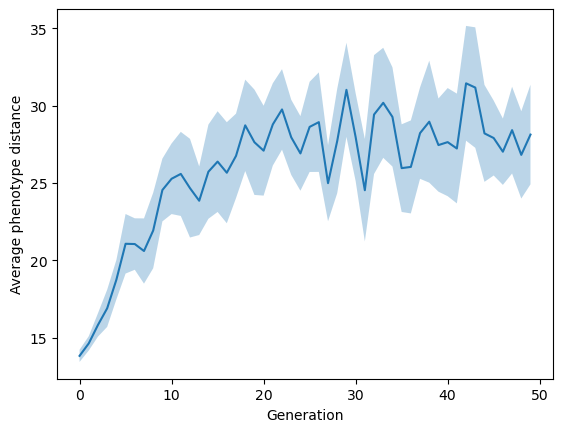

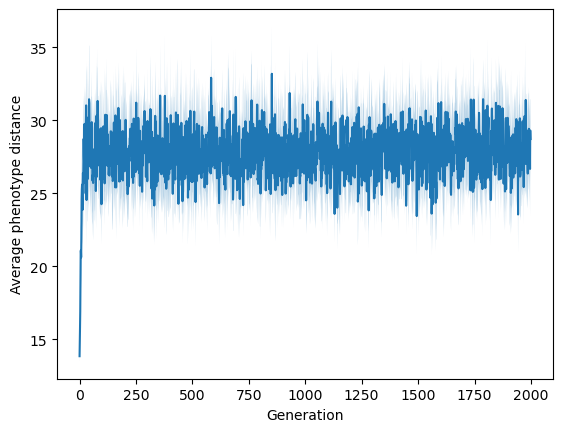

In [7]:
# average over 20 trials, plot confidence interval across all generations 
# X axis: generations, 
# Y axis: average parent_child distance across all trials

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import scipy.stats as st

# Calculate the average parent-child distance across all trials
average_distances = np.mean(pc_distances, axis=0)

# Calculate the confidence interval for each generation
confidence_intervals = [st.t.interval(0.95, len(gen)-1, loc=avg, scale=st.sem(gen)) for gen, avg in zip(pc_distances.T, average_distances)]
confidence_intervals = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals]

# Plotting
plt.plot(range(50), average_distances[:50])
plt.fill_between(range(50), average_distances[:50] - confidence_intervals[:50], average_distances[:50] + confidence_intervals[:50], alpha=0.3)

plt.ylabel('Average phenotype distance')
plt.xlabel('Generation')

# Show the plot
plt.show()

# Plotting
plt.plot(range(len(average_distances)), average_distances)
plt.fill_between(range(len(average_distances)), average_distances - confidence_intervals, average_distances + confidence_intervals, alpha=0.3)

plt.ylabel('Average phenotype distance')
plt.xlabel('Generation')

# Show the plot
plt.show()



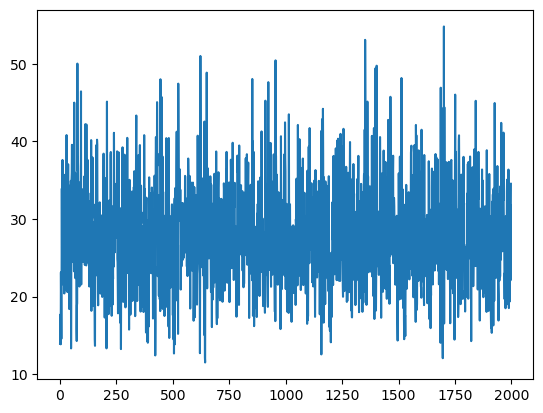

In [59]:
plt.plot(range(len(pc_distances[1])), pc_distances[1])

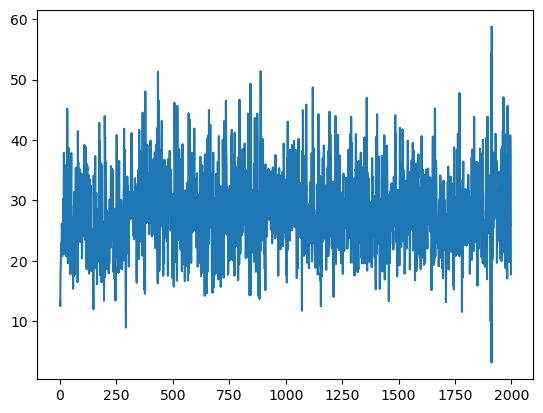

In [50]:
plt.plot(range(len(pc_distances[2])), pc_distances[2])

In [61]:
avg_fitness_over_time = []

for trial in trials:
    avg_fitness_over_time.append([best.fitness for best in trials[trial].best_fitness_history])

avg_fitness_over_time = np.array(avg_fitness_over_time)
# avg_fitness_over_time = np.swapaxes(avg_fitness_over_time, 0, 1)
avg_fitness_over_time.shape

(20, 2000)

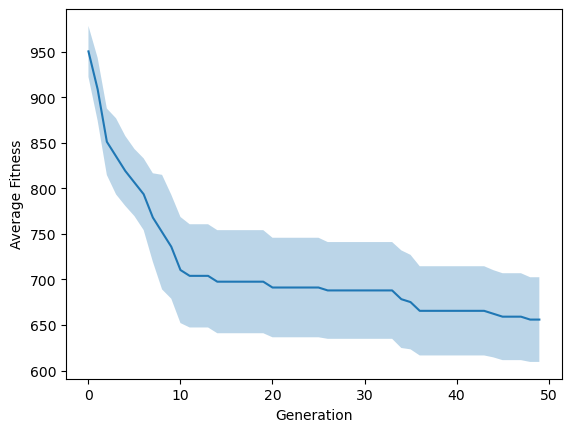

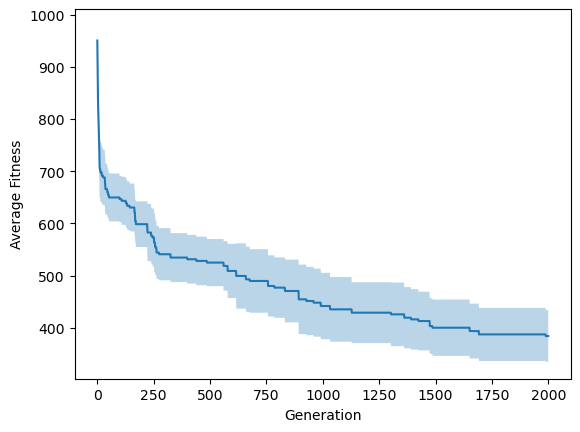

In [96]:
# Calculate the average parent-child distance across all trials
average_distances = np.mean(avg_fitness_over_time, axis=0)

# Calculate the confidence interval for each generation
confidence_intervals = [st.t.interval(0.95, len(gen)-1, loc=avg, scale=st.sem(gen)) for gen, avg in zip(avg_fitness_over_time.T, average_distances)]
confidence_intervals = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals]

# Plotting
plt.plot(range(50), average_distances[:50])
plt.fill_between(range(50), average_distances[:50] - confidence_intervals[:50], average_distances[:50] + confidence_intervals[:50], alpha=0.3)

plt.ylabel('Average Fitness')
plt.xlabel('Generation')

# Show the plot
plt.show()

# Plotting
plt.plot(range(len(average_distances)), average_distances)
plt.fill_between(range(len(average_distances)), average_distances - confidence_intervals, average_distances + confidence_intervals, alpha=0.3)

plt.ylabel('Average Fitness')
plt.xlabel('Generation')

# Show the plot
plt.show()

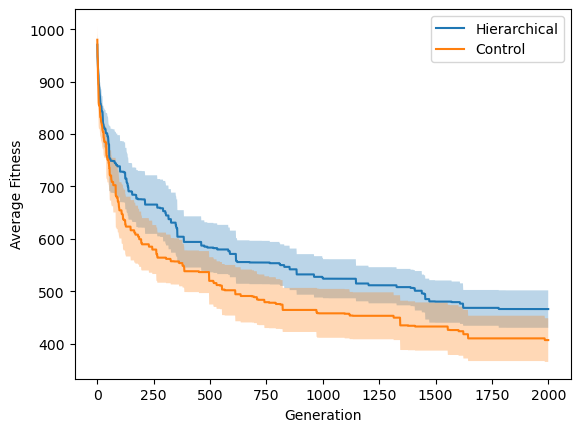

In [36]:
def plot_fitness_confidence_interval(dir, label=None):
    trials = {}
    for item in os.listdir(dir):
        if item.endswith('.pkl'):
            with open(f'{dir}/{item}', 'rb') as pf:
                data = pickle.load(pf)
                t = item.split('_')[-1].split('.')[0]
                trials[t] = data

    # Fitness over time for all trials
    avg_fitness_over_time = []
    for trial in trials:
        avg_fitness_over_time.append([best.fitness for best in trials[trial].best_fitness_history])
    avg_fitness_over_time = np.array(avg_fitness_over_time)
    avg_fitness_over_time.shape


    # Calculate the average parent-child distance across all trials
    average_distances = np.mean(avg_fitness_over_time, axis=0)

    # Calculate the confidence interval for each generation
    confidence_intervals = [st.t.interval(0.95, len(gen)-1, loc=avg, scale=st.sem(gen)) for gen, avg in zip(avg_fitness_over_time.T, average_distances)]
    confidence_intervals = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals]

    # Plotting
    plt.plot(range(len(average_distances)), average_distances, label=label)
    plt.fill_between(range(len(average_distances)), average_distances - confidence_intervals, average_distances + confidence_intervals, alpha=0.3)

    plt.ylabel('Average Fitness')
    plt.xlabel('Generation')


plot_fitness_confidence_interval('./experiments/exp_square_4layer_b1/square_l4_b1', label='Hierarchical')
plot_fitness_confidence_interval('./experiments/exp_square_4layer_b1/square_l4_b1_control', label='Control')
# Show the plot
plt.legend()
plt.show()
# Plotting
# plt.plot(range(len(average_distances)), average_distances)
# plt.fill_between(range(len(average_distances)), average_distances - confidence_intervals, average_distances + confidence_intervals, alpha=0.3)

# plt.ylabel('Average Fitness')
# plt.xlabel('Generation')

# # Show the plot
# plt.show()

In [16]:
layers_distances = {}
for item in os.listdir('./experiments/parent_child_phenotypes/'):
    if '100000' in item and '03' in item:
        with open(f'./experiments/parent_child_phenotypes/{item}', 'rb') as pf:
            data = pickle.load(pf)
            data['parent_child_distance'] = [64-d for d in data['parent_child_distance']]
            item = item.split('_')[2]
            layers_distances[item] = data

In [17]:
del layers_distances['same']
layers_distances.keys()

dict_keys(['l2', 'l3', 'l0', 'l1'])

In [18]:
layers_distances['l0']['parent_child_distance']

[0.0,
 0.0,
 22.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.0,
 0.0,
 0.0,
 0.0,
 17.0,
 0.0,
 23.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 31.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 23.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 36.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 29.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

([<matplotlib.axis.XTick at 0x7fd191090970>,
 [Text(0, 0, 'l0'), Text(1, 0, 'l1'), Text(2, 0, 'l2'), Text(3, 0, 'l3')])

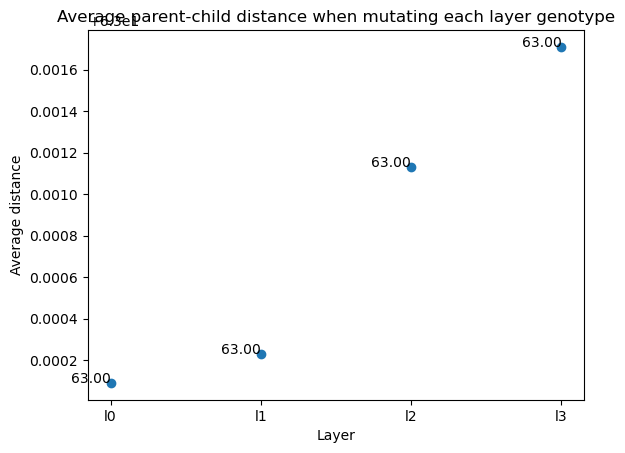

In [10]:
# Make box plot of the parent_child_distance for each layer in same plot
distance_means = {layer: np.mean(layers_distances[layer]['parent_child_distance']) for layer in layers_distances}

# plot mean of each layer
# plt.bar(range(len(distance_means)), sorted(list(distance_means.values())), tick_label=sorted(list(distance_means.keys())))

# Plot a scatter plot as well
plt.scatter(range(len(distance_means)), sorted(list(distance_means.values())))
# Label points with the actual means
for i, layer in enumerate(sorted(list(distance_means.keys()))):
    plt.text(i, distance_means[layer], f'{distance_means[layer]:.2f}', ha='right')
plt.ylabel('Average distance')
plt.xlabel('Layer')
plt.title('Average parent-child distance when mutating each layer genotype')

plt.xticks(range(len(distance_means)), sorted(list(distance_means.keys())))

([<matplotlib.axis.XTick at 0x7f8c3891a130>,
 [Text(0, 0, 'l0'), Text(1, 0, 'l1'), Text(2, 0, 'l2'), Text(3, 0, 'l3')])

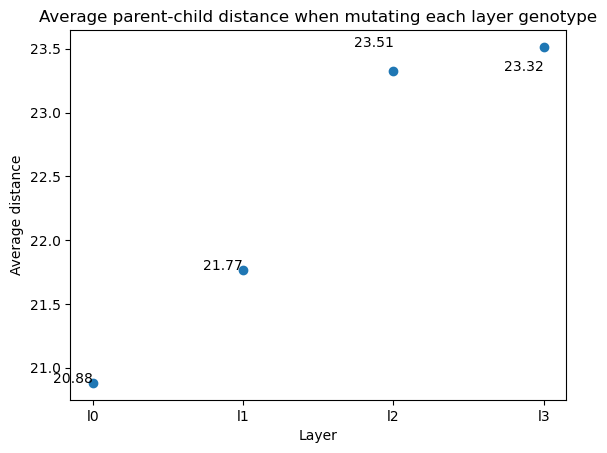

In [33]:
# Make box plot of the parent_child_distance for each layer in same plot
distance_means = {layer: np.mean([d for d in layers_distances[layer]['parent_child_distance'] if d != 0]) for layer in layers_distances}

# plot mean of each layer
# plt.bar(range(len(distance_means)), sorted(list(distance_means.values())), tick_label=sorted(list(distance_means.keys())))

# Plot a scatter plot as well
plt.scatter(range(len(distance_means)), sorted(list(distance_means.values())))
# Label points with the actual means
for i, layer in enumerate(sorted(list(distance_means.keys()))):
    plt.text(i, distance_means[layer], f'{distance_means[layer]:.2f}', ha='right')
plt.ylabel('Average distance')
plt.xlabel('Layer')
plt.title('Average parent-child distance when mutating each layer genotype')

plt.xticks(range(len(distance_means)), sorted(list(distance_means.keys())))

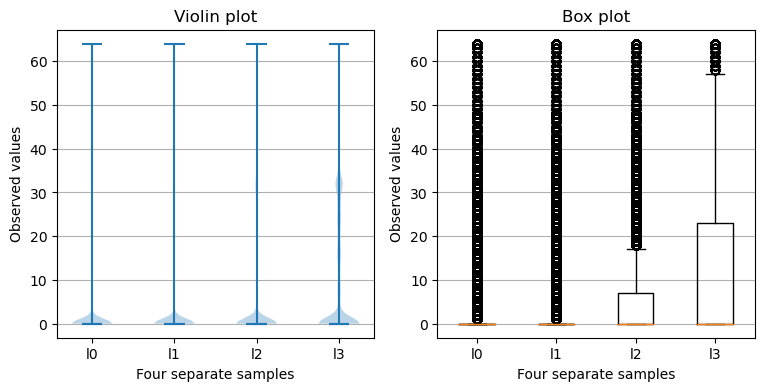

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

all_data = [layers_distances[layer]['parent_child_distance'] for layer in sorted(list(layers_distances.keys()))]

labels=sorted(list(layers_distances.keys()))

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=labels)
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [87]:
# Compute means and print p value for the mean of each layer 
for i, layer in enumerate(sorted(list(layers_distances.keys()))):
    for j, layer2 in enumerate(sorted(list(layers_distances.keys()))):
        if i < j:
            print(f'{layer} vs {layer2}')
            print(st.ttest_ind(layers_distances[layer]['parent_child_distance'], layers_distances[layer2]['parent_child_distance'], equal_var=True))

l0 vs l1
Ttest_indResult(statistic=-8.906977115884889, pvalue=5.286741074985264e-19)
l0 vs l2
Ttest_indResult(statistic=-38.367570782452944, pvalue=0.0)
l0 vs l3
Ttest_indResult(statistic=-109.07235388742677, pvalue=0.0)
l1 vs l2
Ttest_indResult(statistic=-29.46624678739932, pvalue=1.999569366363296e-190)
l1 vs l3
Ttest_indResult(statistic=-99.71369255765303, pvalue=0.0)
l2 vs l3
Ttest_indResult(statistic=-68.91253105165745, pvalue=0.0)


l0 0.9211
l1 0.85506
l2 0.68852
l3 0.43155


([<matplotlib.axis.XTick at 0x7fd1a22274c0>,
 [Text(0, 0, 'Layer 0'),
  Text(1, 0, 'Layer 1'),
  Text(2, 0, 'Layer 2'),
  Text(3, 0, 'Layer 3')])

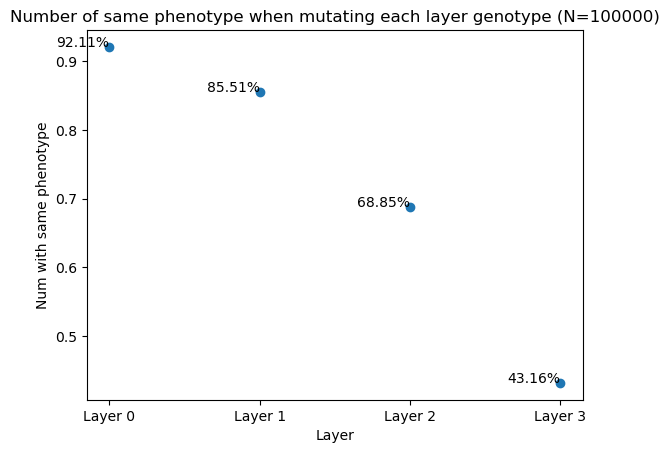

In [19]:
# Number of parents and children with the same exact phenotype for each layer
N = 100000
num_same_phenotype = {layer: np.sum([1 for d in layers_distances[layer]['parent_child_distance'] if d == 0]) / N for layer in layers_distances}

# Plot a scatter plot as well
plt.scatter(range(len(num_same_phenotype)), [num_same_phenotype[layer] for layer in sorted(list(num_same_phenotype.keys()))])
# Label points with the actual means
for i, layer in enumerate(sorted(list(num_same_phenotype.keys()))):
    print(layer, num_same_phenotype[layer])
    percent = num_same_phenotype[layer] * 100
    plt.text(i, num_same_phenotype[layer], f'{percent:.2f}%', ha='right')

plt.ylabel('Proportion P-C pairs w/ same phenotype')
plt.xlabel('Layer')
plt.title('Number of same phenotype when mutating each layer genotype (N=100000)')

plt.xticks(range(len(num_same_phenotype)), sorted([f'Layer {l[1]}' for l in list(num_same_phenotype.keys())]))

In [107]:
import scipy.stats as stats

# Compute means and print p value for the mean of each layer 
for i, layer in enumerate(sorted(list(layers_distances.keys()))):
    for j, layer2 in enumerate(sorted(list(layers_distances.keys()))):
        if i < j:
            n = 100000
            x1 = num_same_phenotype[layer]
            x2 = num_same_phenotype[layer2]
            # Calculate proportions
            p1 = x1 / n
            p2 = x2 / n

            # Calculate the pooled sample proportion
            P = (x1 + x2) / (n + n)

            # Calculate standard error
            SE = (P * (1 - P) * (1/n + 1/n)) ** 0.5

            # Calculate the Z-score
            Z = (p1 - p2) / SE

            # Calculate the P-value
            p_value = 2 * (1 - stats.norm.cdf(abs(Z)))  # two-tailed test

            print(f'{layer} vs {layer2}')
            print(f'p value: {p_value}')

l0 vs l1
p value: 5.047398055069152e-09
l0 vs l2
p value: 0.0
l0 vs l3
p value: 0.0
l1 vs l2
p value: 0.0
l1 vs l3
p value: 0.0
l2 vs l3
p value: 0.0


In [22]:
def open_hillclimber(file_path):
    with open(file_path, 'rb') as pf:
        data = pickle.load(pf)

    return data


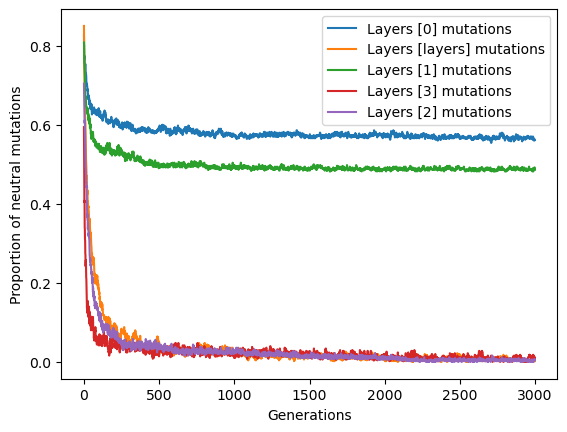

In [23]:
# def plot_neutral_mutations_over_generations():
#     for l in range(4):
#         hc = open_hillclimber(f'experiments/exp_hillclimbers_by_layer_3/mutate_layer_{l}/mutate_layer_{l}_t0.pkl')
#         plt.plot(np.array(hc.n_neutral_over_generations[1:]) / (hc.target_population_size), label=f'Layer {l} mutations')

#     hc = open_hillclimber(f'experiments/exp_hillclimbers_by_layer_3/mutate_all_layers/mutate_all_layers_t0.pkl')
#     plt.plot(np.array(hc.n_neutral_over_generations[1:]) / (hc.target_population_size), label=f'All layers mutations')
#     plt.ylabel('Proportion of neutral mutations')
#     plt.xlabel('Generations')
#     plt.legend()
#     plt.show()

def plot_neutral_mutations_over_generations(dir_path):
    for item in os.listdir(dir_path):
        if os.path.isdir(f'{dir_path}/{item}'):
            dir_contents = os.listdir(f'{dir_path}/{item}')
            if len(dir_contents) > 0:
                pkl_file = dir_contents[0]
                hc = open_hillclimber(f'{dir_path}/{item}/{pkl_file}')
                layers = pkl_file.split('_')[-2]
                plt.plot(np.array(hc.n_neutral_over_generations[1:]) / (hc.target_population_size), label=f'Layers [{layers}] mutations')
    plt.ylabel('Proportion of neutral mutations')
    plt.xlabel('Generations')
    plt.legend()
    # plt.show()

plot_neutral_mutations_over_generations('experiments/exp_hillclimbers_by_layer_3')

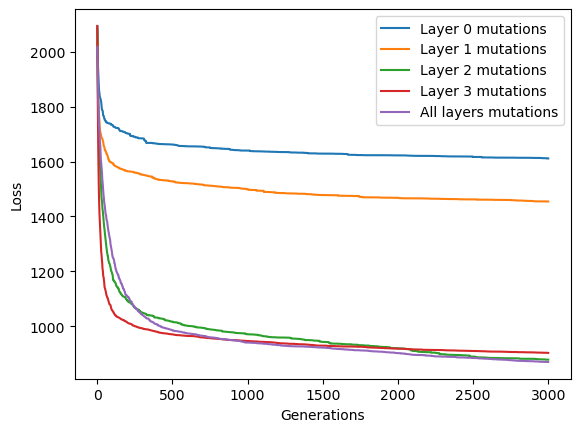

In [24]:
def plot_fitness_over_generations(exp_dir):
    for l in range(4):
        hc = open_hillclimber(f'{exp_dir}/mutate_layer_{l}/mutate_layer_{l}_t0.pkl')
        plt.plot(hc.mean_fitness_history, label=f'Layer {l} mutations')

    hc = open_hillclimber(f'{exp_dir}/mutate_all_layers/mutate_all_layers_t0.pkl')
    plt.plot(hc.mean_fitness_history, label=f'All layers mutations')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_fitness_over_generations('experiments/exp_hillclimbers_by_layer_3')

In [25]:
def plot_layer_neutrality_over_generations(exp_dir):
    for l in range(4):
        hc = open_hillclimber(f'{exp_dir}/mutate_layer_{l}/mutate_layer_{l}_t0.pkl')
        plt.plot(hc.mean_fitness_history, label=f'Layer {l} mutations')

    hc = open_hillclimber(f'{exp_dir}/mutate_all_layers/mutate_all_layers_t0.pkl')
    plt.plot(hc.mean_fitness_history, label=f'All layers mutations')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_fitness_over_generations('experiments/exp_hc_multiple_layers')

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/exp_hc_multiple_layers/mutate_layer_0/mutate_layer_0_t0.pkl'

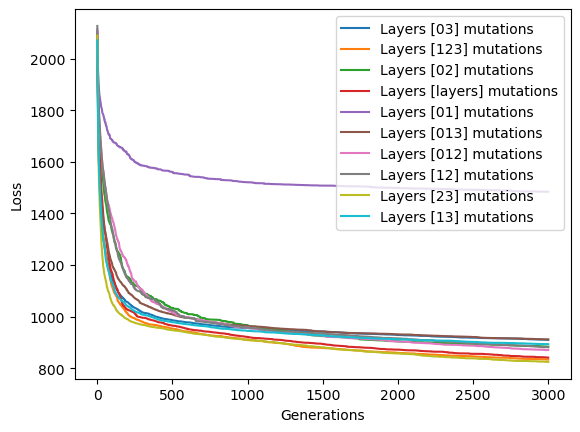

In [26]:
def plot_fitness_over_generations(exp_dir):
    for item in os.listdir(exp_dir):
        if os.path.isdir(f'{exp_dir}/{item}'):
            dir_contents = os.listdir(f'{exp_dir}/{item}') # [0]
            if len(dir_contents) > 0:
                pkl_file = dir_contents[0]
                hc = open_hillclimber(f'{exp_dir}/{item}/{pkl_file}')
                layers = pkl_file.split('_')[-2]
                plt.plot(hc.mean_fitness_history, label=f'Layers [{layers}] mutations')

    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.legend()
    # plt.show()

# plot_fitness_over_generations('experiments/exp_hillclimbers_by_layer_3')

plot_fitness_over_generations('experiments/exp_hc_multiple_layers')

plt.show()

In [30]:
with open('./experiments/exp_hc_multiple_layers/mutate_all_layers/mutate_all_layers_t0.pkl', 'rb') as pf:
    data = pickle.load(pf)
print(data.mutation_data_over_generations)

AttributeError: 'HillClimber' object has no attribute 'mutation_data_over_generations'

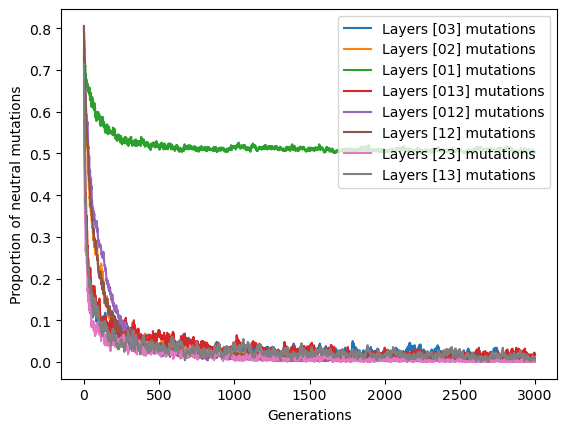

In [8]:


plot_neutral_mutations_over_generations('./experiments/exp_hc_multiple_layers')

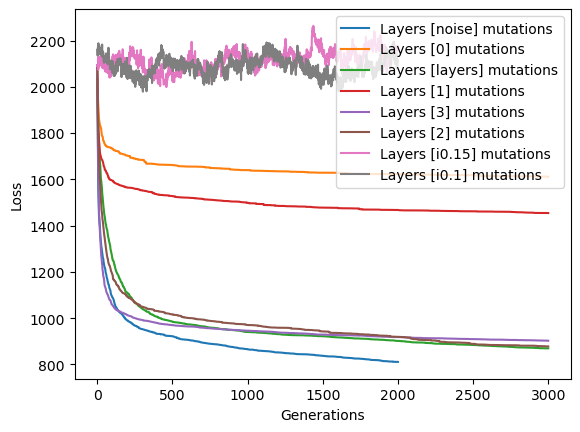

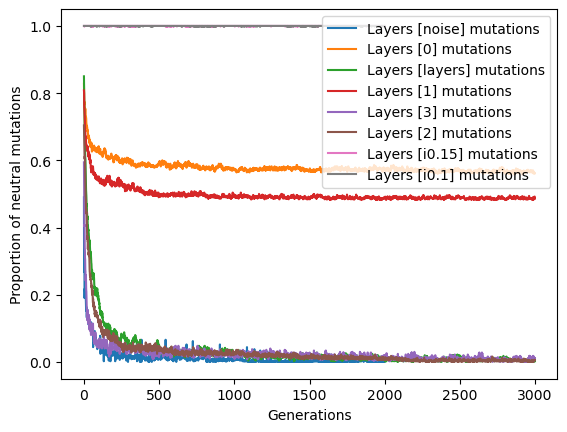

In [25]:
plot_fitness_over_generations('experiments/exp_square_4layer_b4_noise')
plot_fitness_over_generations('experiments/exp_hillclimbers_by_layer_3')
plot_fitness_over_generations('./experiments/Mar3_noise_exp')
plt.show()
plot_neutral_mutations_over_generations('./experiments/exp_square_4layer_b4_noise')
plot_neutral_mutations_over_generations('./experiments/exp_hillclimbers_by_layer_3')
plot_neutral_mutations_over_generations('./experiments/Mar3_noise_exp')
plt.show()

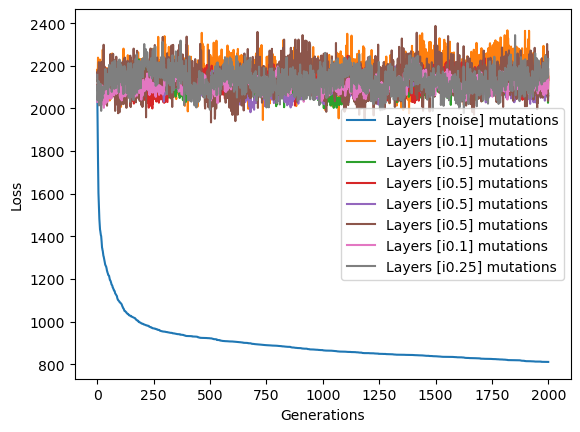

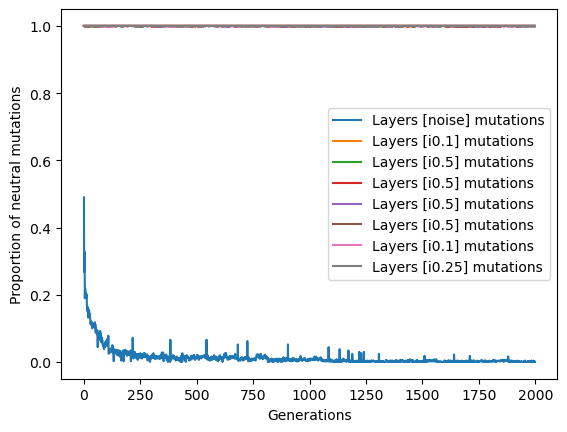

In [23]:
plot_fitness_over_generations('experiments/exp_square_4layer_b4_noise')
plot_fitness_over_generations('./experiments/Mar2_exp_square_b4l4_noise')

plt.show()
# plot_fitness_over_generations('experiments/exp_hillclimbers_by_layer_3')
# plt.show()
plot_neutral_mutations_over_generations('./experiments/exp_square_4layer_b4_noise')
# plot_neutral_mutations_over_generations('./experiments/exp_hillclimbers_by_layer_3')
plot_neutral_mutations_over_generations('./experiments/Mar2_exp_square_b4l4_noise')
plt.show()

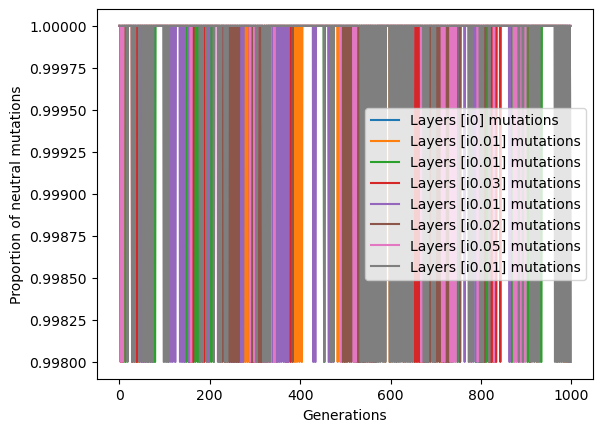

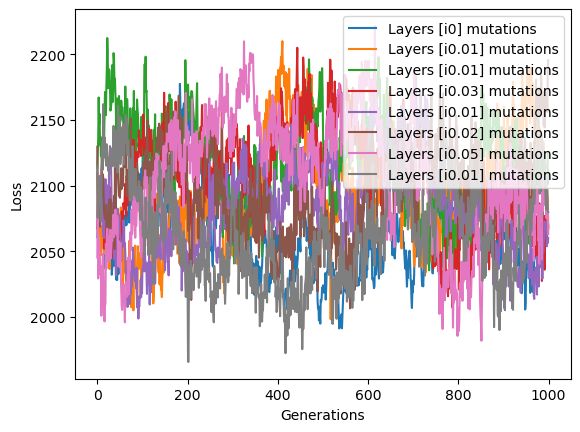

In [34]:
plot_neutral_mutations_over_generations('./experiments/Mar3_exp_square_tinynoise')
plt.show()
plot_fitness_over_generations('./experiments/Mar3_exp_square_tinynoise')